In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
pd.set_option('display.max_columns', None)

In [29]:
FF_2020 = pd.read_excel('../LeagueHistory.xlsx', sheet_name='2020') \
            .drop(['TOTAL', 'Mean', 'Std', 'Median','Year','Playoffs','Owner'],1) \
            .drop([12],0)
        
labels = np.array(FF_2020['Team_Name'])

FF_2020

,Team_Name,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14
0,Brady Washed Up II,101.96,154.04,135.64,110.00,102.66,93.26,128.18,109.32,106.54,106.48,122.04,153.34,87.56,102.32
1,Gee Whiz Darnell,90.38,155.10,128.54,94.82,112.32,80.28,106.72,72.86,110.60,112.46,96.70,89.78,100.50,102.92
2,Burnett = Microdong,134.54,121.60,114.18,121.88,107.74,103.92,86.70,65.96,123.54,67.24,89.32,114.20,96.58,95.76
3,GOBias Industries,85.30,72.26,68.48,135.62,63.20,104.64,90.36,79.72,72.48,49.72,72.42,98.40,97.14,68.28
4,Big Whack,109.00,97.62,101.78,113.90,101.64,117.84,92.06,70.46,69.96,120.34,92.34,85.70,113.12,91.54
5,Mr. Fans Noodle Haus,84.82,83.04,122.60,55.82,110.00,112.12,119.40,71.34,101.72,109.26,81.96,103.40,57.02,121.56
6,Schmop,99.26,112.70,148.32,121.98,117.42,78.70,106.72,134.34,148.10,88.10,111.44,127.34,104.50,87.10
7,Jasjaap's Primo Team,119.10,105.58,108.72,102.50,93.72,78.62,89.78,80.00,70.58,96.84,55.10,28.70,104.34,125.70
8,Sackwash Lyfe,139.92,120.00,72.06,120.08,108.36,113.80,122.96,119.80,93.14,104.62,142.06,132.62,90.54,109.54
9,Wakandan Warriors,119.14,91.88,124.20,97.34,83.50,120.30,88.40,97.74,85.18,99.04,117.72,107.38,94.72,96.22


In [30]:
averages = np.zeros(14)
for z in range(14):
    averages[z] = np.mean(FF_2020.loc[:,'Week '+str(z+1)])

cumulatives = np.zeros(168).reshape(12, 14)
for c in range(14):
    for r in range(12):
        cumulatives[r, c] = np.sum(FF_2020.loc[r, 'Week 1': 'Week '+str(c+1)])
    
average_cum_per_week = np.mean(cumulatives, axis=0)
average_cum_per_week

array([  106.38833333,   218.33666667,   330.53      ,   436.25833333,
         537.91666667,   636.05333333,   741.33833333,   829.48      ,
         923.375     ,  1017.43166667,  1113.91666667,  1214.23833333,
        1311.79833333,  1412.62333333])

In [31]:
cum_diffs = cumulatives.copy()
for r in range(12):
    cum_diffs[r,:] = cum_diffs[r,:] - average_cum_per_week

cum_diffs = np.hstack((np.zeros(24).reshape(12,2), cum_diffs))
cum_diffs = cum_diffs[:, 1:]

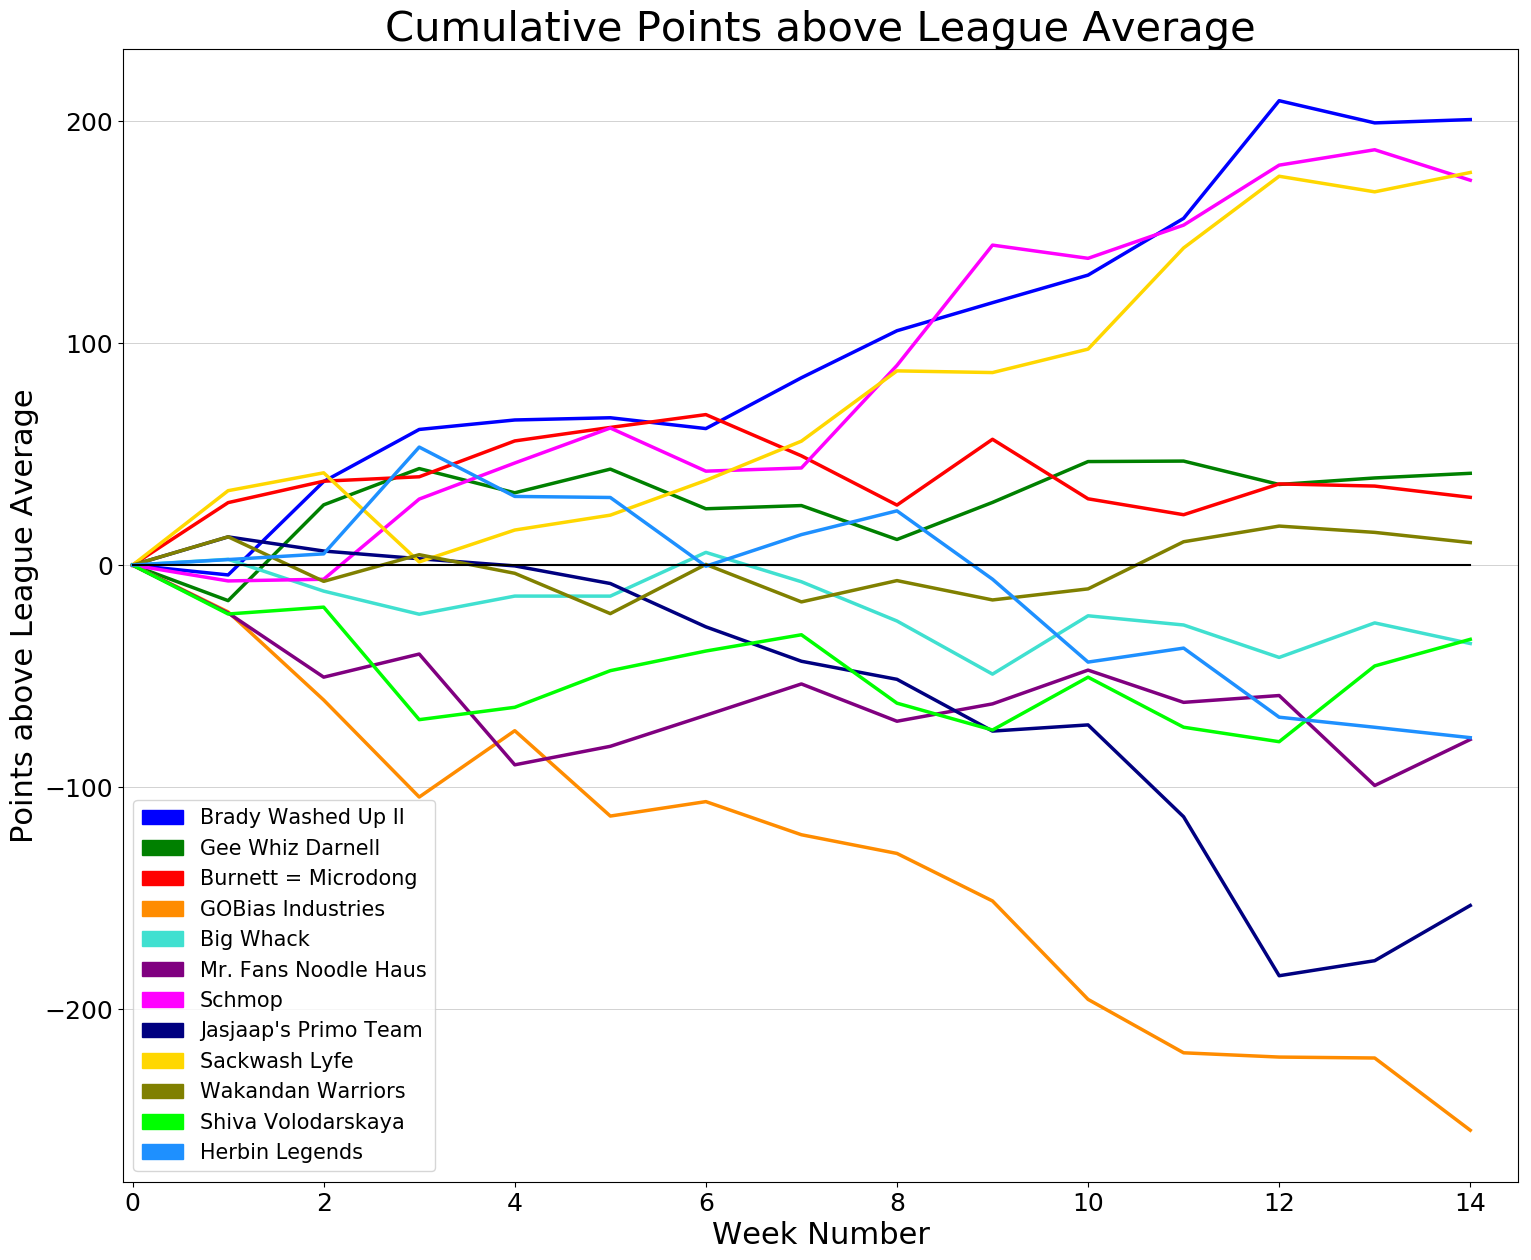

In [32]:
plt.figure(figsize=[18, 15])

colors = ['blue', 'green', 'red', 'darkorange', 'turquoise', 'purple',
          'magenta', 'navy', 'gold', 'olive', 'lime', 'dodgerblue']

patches = []
for i in range(12):
    plt.plot(np.array(cum_diffs[i,:]), colors[i], lw=2.5)
    patches.append(mpatches.Patch(color=colors[i], label=labels[i]))
    

plt.plot([0.0,14], [0,0], color = 'k')

plt.xlim([-0.1, 14.5])
plt.xlabel('Week Number', size=22)
plt.ylabel('Points above League Average', size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title('Cumulative Points above League Average', size=30)

plt.legend(handles=patches,prop={'size':15})
plt.grid(axis='y', lw=0.4)